In [1]:
# Using Conv Nets to classify iamges
# There are 5 categories: arctic fox, earless seal, penguin, polar bear, snow leopard
# Each class has around 400 images in total
# The data are split into training set (80%), validation set (10%), and test set (10%)
# The model builds up convolutional network from scratch, and does not use any kind of data augmentation methods.

In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 147968)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                9

In [5]:
from keras import optimizers
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
import os,shutil

In [8]:
base_dir = 'E:/pictures splited'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [9]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical')

Found 1583 images belonging to 5 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 400 images belonging to 5 classes.


In [11]:
history = model.fit_generator(
  train_generator,
  epochs=10,
  validation_data=validation_generator,
  validation_steps = 1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 6/50 [==>...........................] - ETA: 36s - loss: 4.3677 - accuracy: 0.2396

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 49s 970ms/step - loss: 2.0676 - accuracy: 0.2388 - val_loss: 1.4037 - val_accuracy: 0.3125
Epoch 2/10
50/50 [==============================] - 46s 927ms/step - loss: 1.4394 - accuracy: 0.4043 - val_loss: 1.3528 - val_accuracy: 0.3438
Epoch 3/10
50/50 [==============================] - 50s 998ms/step - loss: 1.2225 - accuracy: 0.5205 - val_loss: 1.2026 - val_accuracy: 0.5625
Epoch 4/10
50/50 [==============================] - 54s 1s/step - loss: 0.9701 - accuracy: 0.6292 - val_loss: 1.0005 - val_accuracy: 0.6875
Epoch 5/10
50/50 [==============================] - 51s 1s/step - loss: 0.7585 - accuracy: 0.7183 - val_loss: 0.6566 - val_accuracy: 0.7188
Epoch 6/10
50/50 [==============================] - 46s 921ms/step - loss: 0.5227 - accuracy: 0.8200 - val_loss: 1.5474 - val_accuracy: 0.4062
Epoch 7/10
50/50 [==============================] - 46s 924ms/step - loss: 0.3352 - accuracy: 0.8838 - val_loss: 1.2902 - val_accuracy: 0.5625
Epoch 8/10
50/50

In [12]:
history.history

{'loss': [2.067624092102051,
  1.4394152164459229,
  1.2225100994110107,
  0.9700801968574524,
  0.7584925889968872,
  0.5226662755012512,
  0.33516648411750793,
  0.16975367069244385,
  0.1619267463684082,
  0.10732585936784744],
 'accuracy': [0.23878711462020874,
  0.4042956531047821,
  0.520530641078949,
  0.6291850805282593,
  0.7182564735412598,
  0.8199620842933655,
  0.8837649822235107,
  0.9425142407417297,
  0.9583070278167725,
  0.9772583842277527],
 'val_loss': [1.4036929607391357,
  1.352846384048462,
  1.20258367061615,
  1.0005342960357666,
  0.6565596461296082,
  1.5473544597625732,
  1.2902337312698364,
  1.897654414176941,
  2.0035359859466553,
  1.9714562892913818],
 'val_accuracy': [0.3125,
  0.34375,
  0.5625,
  0.6875,
  0.71875,
  0.40625,
  0.5625,
  0.59375,
  0.5625,
  0.59375]}

In [13]:
model.save('five_animals_from_scratch.h5')

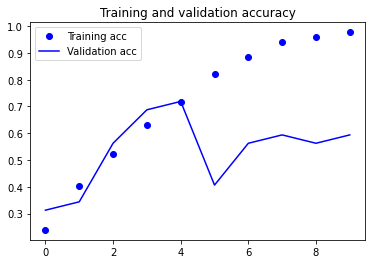

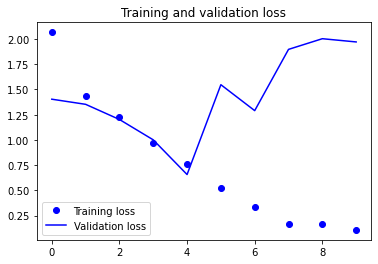

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
print('This model is overfitting.')

This model is overfitting.
